In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
COLORS = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#D55E00", "#CC79A7", "#56B4E9", "#009E73", "#F0E442", "#0072B2"]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=COLORS) 

## Helper Functions

In [2]:
def image2NormalisedHistogram(image):
    """
    Converts an image to a normalised histogram
    image -> 2D numpy array (grayscale)
    """
    # Checking if the image is grayscale
    if len(image.shape) != 2:
        raise ValueError('Image must be grayscale')

    # Converting images from 0-1 to 0-255 scale
    image = np.round(image*255).astype(np.uint8)
    
    # Computing the histogram
    histogram = np.zeros(256)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            histogram[image[i,j]] += 1
    
    # Normalising the histogram
    histogram /= np.sum(histogram)
    return histogram

In [3]:
def pmfEntropy(pmf):
    """
    Computes the entropy of a discrete distribution
    pmf -> list of probabilities (We don't need the outcomes)
    """
    
    # Checking if the probability distribution is valid
    if np.abs(sum(pmf) - 1) > 1e-6:
        raise ValueError('The sum of probabilities must be 1')

    # Computing the entropy
    entropy = 0
    for p in pmf:
        if p < 0:
            raise ValueError('Probabilities must be positive')
        elif p == 0: # 0*log(0) = 0
            continue
        else:
            entropy -= p*np.log2(p)
    return entropy

In [4]:
def klDivergence(pmf1, pmf2):
    """
    Computes the KL divergence between two discrete distributions
    pmf1 -> list of probabilities (We don't need the outcomes)
    pmf2 -> list of probabilities (We don't need the outcomes)
    """
    
    # Checking if the probability distributions are valid
    if np.abs(sum(pmf1) - 1) > 1e-6 or np.abs(sum(pmf2) - 1) > 1e-6:
        raise ValueError('The sum of probabilities must be 1')
    if len(pmf1) != len(pmf2):
        raise ValueError('The two distributions must have the same support') 

    # Computing the KL divergence
    kl = 0
    for p1, p2 in zip(pmf1, pmf2):
        if p1 < 0 or p2 < 0:
            raise ValueError('Probabilities must be positive')
        elif p1 == 0: # 0*log(0/q(x)) = 0
            continue
        elif p2 == 0: # p(x)*log(p(x)/0) = inf
            return np.inf
        else:
            kl += p1*np.log2(p1/p2)
    return kl

## Distance Between PDFs

### Cross Entropy

In [5]:
def crossEntropy(pmf1, pmf2):
    """
    Computes the cross entropy between two discrete distributions
    pmf1 -> list of probabilities (We don't need the outcomes)
    pmf2 -> list of probabilities (We don't need the outcomes)
    """
    
    # Checking if the probability distributions are valid
    if np.abs(sum(pmf1) - 1) > 1e-6 or np.abs(sum(pmf2) - 1) > 1e-6:
        raise ValueError('The sum of probabilities must be 1')
    if len(pmf1) != len(pmf2):
        raise ValueError('The two distributions must have the same support') 

    # Computing the cross entropy
    ce = 0
    for p1, p2 in zip(pmf1, pmf2):
        if p1 < 0 or p2 < 0:
            raise ValueError('Probabilities must be positive')
        elif p1 == 0: # 0*log(q(x)) = 0
            continue
        elif p2 == 0: # p(x)*log(p(x)/0) = inf
            return np.inf
        else:
            ce -= p1*np.log2(p2)
    return ce

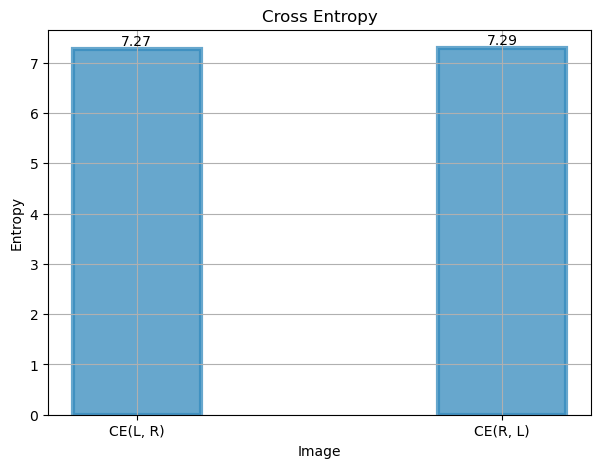

In [6]:
image1 = plt.imread('left.png')
image2 = plt.imread('right.png')

# Computing the probability distributions
histogram1 = image2NormalisedHistogram(image1)
histogram2 = image2NormalisedHistogram(image2)

# Computing the Cross Entropy
cross_entropies = []
cross_entropies.append(crossEntropy(histogram1, histogram2)) # Cross Entropy CE(L, R)
cross_entropies.append(crossEntropy(histogram2, histogram1)) # Cross Entropy CE(R, L)

plt.figure(figsize=(7, 5))
plt.bar(np.arange(len(cross_entropies)), cross_entropies, edgecolor=COLORS[0], width=0.35, lw=3, alpha=0.75)
for i in range(len(cross_entropies)):
    plt.text(i, cross_entropies[i]+0.01, f'{np.round(cross_entropies[i], 2)}', ha='center', va='bottom')
plt.xticks(np.arange(len(cross_entropies)), ['CE(L, R)', 'CE(R, L)'])
plt.xlabel('Image')
plt.ylabel('Entropy')
plt.title('Cross Entropy')
plt.grid(True)
plt.show()

In [7]:
rs = np.array([0.1, 0.5, 0.7]) # r values
ss = np.linspace(0, 1, 1000) # 1000 values between 0 and 1 (inclusive)

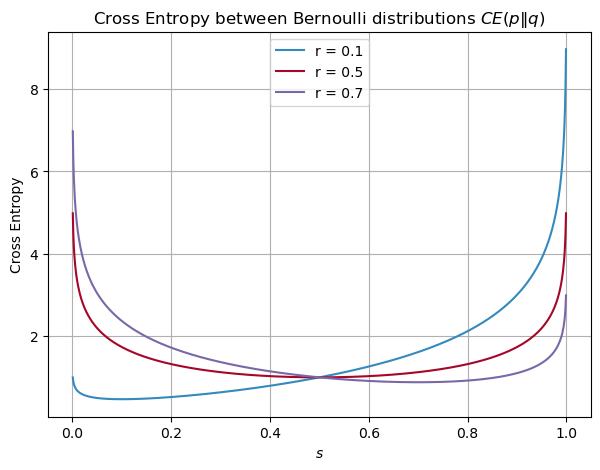

In [8]:
# Cross Entropy between Bernoulli distributions
ces = [[crossEntropy([r, 1-r], [s, 1-s]) for s in ss] for r in rs]
plt.figure(figsize=(7, 5))
for i, ce in enumerate(ces):
    plt.plot(ss, ce, label=f'r = {rs[i]}')
plt.xlabel(r'$s$')
plt.ylabel('Cross Entropy')
plt.title(r'Cross Entropy between Bernoulli distributions $CE(p\|q)$')
plt.grid(True)
plt.legend(loc="upper center")
plt.show()

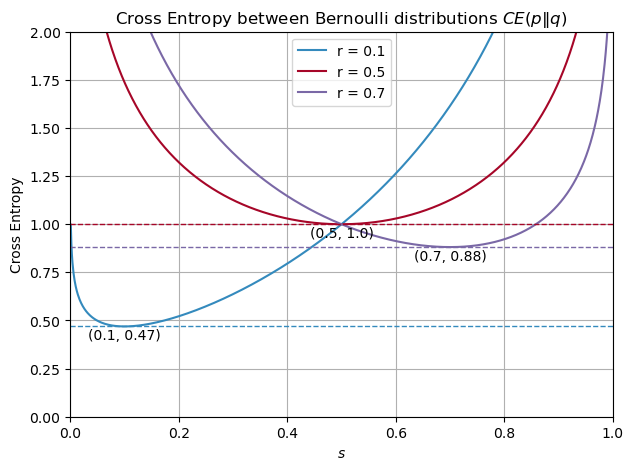

In [9]:
# Zoomed in plot
plt.figure(figsize=(7, 5))
for i, ce in enumerate(ces):
    plt.plot(ss, ce, label=f'r = {rs[i]}')

minimum_values = [np.min(ce) for ce in ces]
for i in range(len(minimum_values)):
    plt.text(rs[i], minimum_values[i]-0.01, f'({rs[i]}, {np.round(minimum_values[i], 2)})', ha='center', va='top')
    plt.hlines(minimum_values[i], 0, 1, linestyles='dashed', lw=1, colors=COLORS[i])
plt.xlabel(r'$s$')
plt.ylabel('Cross Entropy')
plt.title(r'Cross Entropy between Bernoulli distributions $CE(p\|q)$')
plt.grid(True)
plt.legend(loc="upper center")
plt.xlim(0, 1)
plt.ylim(0, 2)
plt.show()

We can see from the above plot that the minimum of the curve is at $p(x) = q(x)$, which is the same as minimizing the cross entropy between the two distributions. Thus, on minimising $CE(p,q)$, we get matched PMFs.

### Jensen Shannon Divergence

In [10]:
def jsDivergence(pmf1, pmf2):
    """
    Computes the Jensen-Shannon divergence between two discrete distributions
    pmf1 -> list of probabilities (We don't need the outcomes)
    pmf2 -> list of probabilities (We don't need the outcomes)
    """
    
    # Checking if the probability distributions are valid
    if np.abs(sum(pmf1) - 1) > 1e-6 or np.abs(sum(pmf2) - 1) > 1e-6:
        raise ValueError('The sum of probabilities must be 1')
    if len(pmf1) != len(pmf2):
        raise ValueError('The two distributions must have the same support') 

    # Computing the Jensen-Shannon divergence
    m = [(p1+p2)/2 for p1, p2 in zip(pmf1, pmf2)]
    return klDivergence(pmf1, m) + klDivergence(pmf2, m)

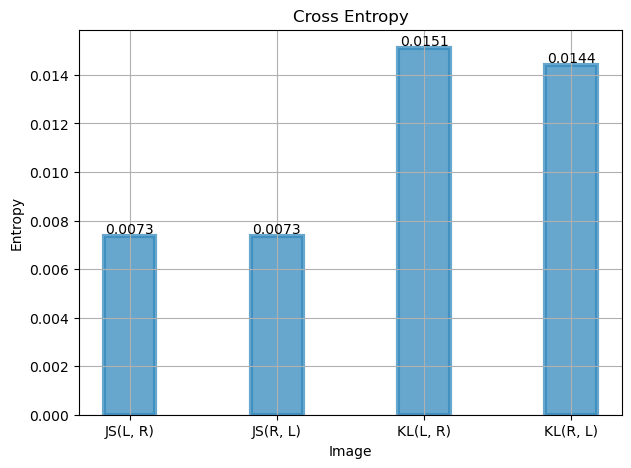

In [11]:
image1 = plt.imread('left.png')
image2 = plt.imread('right.png')

# Computing the probability distributions
histogram1 = image2NormalisedHistogram(image1)
histogram2 = image2NormalisedHistogram(image2)

# Computing the Cross Entropy
divergence = []
divergence.append(jsDivergence(histogram1, histogram2)) # Cross Entropy JS(L, R)
divergence.append(jsDivergence(histogram2, histogram1)) # Cross Entropy JS(R, L)
divergence.append(klDivergence(histogram1, histogram2)) # Cross Entropy KL(L, R)
divergence.append(klDivergence(histogram2, histogram1)) # Cross Entropy KL(R, L)

plt.figure(figsize=(7, 5))
plt.bar(np.arange(len(divergence)), divergence, edgecolor=COLORS[0], width=0.35, lw=3, alpha=0.75)
for i in range(len(divergence)):
    plt.text(i, divergence[i], f'{np.round(divergence[i], 4)}', ha='center', va='bottom')
plt.xticks(np.arange(len(divergence)), ['JS(L, R)', 'JS(R, L)', 'KL(L, R)', 'KL(R, L)'])
plt.xlabel('Image')
plt.ylabel('Entropy')
plt.title('Cross Entropy')
plt.grid(True)
plt.show()

In [12]:
# Checking if JS is symmetric
print(f'JS(L, R) = {jsDivergence(histogram1, histogram2)}')
print(f'JS(R, L) = {jsDivergence(histogram2, histogram1)}')

# Checking if KL is symmetric
print(f'KL(L, R) = {klDivergence(histogram1, histogram2)}')
print(f'KL(R, L) = {klDivergence(histogram2, histogram1)}')

JS(L, R) = 0.0073460795386296514
JS(R, L) = 0.0073460795386296514
KL(L, R) = 0.015104015237387055
KL(R, L) = 0.014409785833354494


We can see from the above values that Jensen Shannon Divergence is a symmetric divergence as $JS(L,R) = JS(R,L)$ whereas KL Divergence is not as $KL(L,R) \neq KL(R,L)$.

### Wasserstein Distance

In [13]:
def checkJointDist(joint_pmf, pmf1, pmf2):
    """
    Checks whether the joint distribution is a valid joint distribution of the given marginal distributions
    joint_pmf -> 2D numpy array (joint distribution)
    pmf1 -> list of probabilities 
    pmf2 -> list of probabilities 
    """

    # Checking if the probability distributions are valid
    if np.abs(sum(pmf1) - 1) > 1e-6 or np.abs(sum(pmf2) - 1) > 1e-6:
        raise ValueError('The sum of probabilities must be 1')

    # Checking if the joint distribution is valid
    if np.abs(np.sum(joint_pmf) - 1) > 1e-6:
        raise ValueError('The sum of probabilities must be 1')
    if np.any(joint_pmf < 0):
        raise ValueError('Probabilities must be positive')

    # Checking if the joint distribution is a valid joint distribution of the given marginal distributions
    if len(pmf1) != joint_pmf.shape[0] or len(pmf2) != joint_pmf.shape[1]:
        if len(pmf1) != joint_pmf.shape[1] or len(pmf2) != joint_pmf.shape[0]:
            joint_pmf = joint_pmf.T
        else:
            return False 
    
    # Calculating the marginal distributions
    marginal_pmf1 = np.sum(joint_pmf, axis=1)
    marginal_pmf2 = np.sum(joint_pmf, axis=0)

    # Checking if the marginal distributions are equal to the given marginal distributions
    if np.any(np.abs(marginal_pmf1 - pmf1) > 1e-6) or np.any(np.abs(marginal_pmf2 - pmf2) > 1e-6):
        if joint_pmf.shape[0] == joint_pmf.shape[1]: # Checking if the joint distribution is symmetric
            # Maybe the marginal distributions are swapped
            if np.any(np.abs(marginal_pmf1 - pmf2) > 1e-6) or np.any(np.abs(marginal_pmf2 - pmf1) > 1e-6):
                return False
        else:
            return False
    return True

In [14]:
# Positive Example
pmf1 = np.array([0.4, 0.3, 0.3]) 
pmf2 = np.array([0.3, 0.2, 0.5])
joint_pmf = np.array([[0.11, 0.10, 0.09], [0.09, 0.05, 0.06], [0.2, 0.15, 0.15]])
# Marginal distributions of above joint distribution are = [0.11 + 0.10 + 0.09, 0.09 + 0.05 + 0.06, 0.2 + 0.15 + 0.15] = [0.3, 0.2, 0.5] and
# [0.11 + 0.09 + 0.2, 0.10 + 0.05 + 0.15, 0.09 + 0.06 + 0.15] = [0.4, 0.3, 0.3] hence the joint distribution is valid
print(f'Is the joint distribution a valid joint distribution of the given marginal distributions? {checkJointDist(joint_pmf, pmf1, pmf2)}')

Is the joint distribution a valid joint distribution of the given marginal distributions? True


In [15]:
# Negative Example
pmf1 = np.array([0.4, 0.3, 0.3])
pmf2 = np.array([0.3, 0.2, 0.5])
joint_pmf = np.array([[0.11, 0.10, 0.09], [0.09, 0.05, 0.07], [0.2, 0.15, 0.14]])
# Marginal distributions of above joint distribution are = [0.11 + 0.10 + 0.09, 0.09 + 0.05 + 0.07, 0.2 + 0.15 + 0.14] = [0.3, 0.21, 0.49] and
# [0.11 + 0.09 + 0.2, 0.10 + 0.05 + 0.15, 0.09 + 0.07 + 0.14] = [0.4, 0.3, 0.3] hence the joint distribution is not valid
print(f'Is the joint distribution a valid joint distribution of the given marginal distributions? {checkJointDist(joint_pmf, pmf1, pmf2)}')

Is the joint distribution a valid joint distribution of the given marginal distributions? False


## Visualizing Data Using T-SNE

### Questions related to T-SNE

1. **What is the crowding problem?**

   In SNE, we try to embed data from a higher dimension to a lower dimension. In higher dimensions, multiple data points can exist on a similar distance to each other. But on reducing dimension, there is no room to accomodate all the points. Thus, the points are crowded together. This is called the crowding problem.

2. **How does the choice of the Student t-distribution in the low dimensional embedding space help address the crowding problem?**

   T-SNE uses a Student t-distribution instead of a Gaussian distribution. The Student t-distribution is heavy-tailed unlike the Gaussian distribution. This means that the probability of distant points is not very small, thus, are captured better. This helps in reducing the crowding problem.

3. **What other important changes have been made in t-SNE relative to SNE?**

   The main differences between t-SNE and SNE are: 
   
   1. T-SNE uses symmetric SNE to compute the joint distributions of higher dimensional and lower dimensional spaces instead of conditional distributions. 
   2. T-SNE uses a Student t-distribution instead of a Gaussian distribution for computing $Q$ which is a heavy-tailed distribution. 
   3. T-SNE is optimized by adding a L2 norm in the cost function to cluster all points near the center at the start of the algorithm to enable the crossing over of points between clusters. This condition is      removed at some iteration later in the algorithm. 
   4. Another optimization made in the algorithm is the multiplication of all ${p_{ij}}$ by a constant. This results in the algorithm moddelling large ${q_{ij}}$ for somewhat large ${p_{ij}}$ and moderate ${q_{ij}}$ for small ${p_{ij}}$. This results in more separated clusters.

### Algorithm1 of T-SNE paper

In [16]:
class tSNE():
    """
    Computes the t-SNE embedding of a dataset
    """
    
    def __init__(self, n_iterations, lr=100, momentum=0.8):
        """
        Initialise t-SNE
        n_iterations -> number of iterations
        lr -> learning rate
        momentum -> alpha(t)
        """

        self.n_iterations = n_iterations
        self.lr = lr
        self.momentum = momentum
    
    def fit(self, data, out_dim=2, kl_div=False):
        """
        Computes the t-SNE embedding of a dataset
        data -> 2D numpy array (dataset)
        out_dim -> output dimension
        """

        p = self.compute_P(data)

        # Initialising y_t
        yt = np.random.multivariate_normal(np.zeros(out_dim), 1e-4*np.eye(out_dim), data.shape[0])
        y_prev = np.zeros_like(yt)

        if kl_div:
            kl_divergences = []

        for _ in range(self.n_iterations):
            q = self.compute_Q(yt)
            if kl_div:
                kl_divergences.append(klDivergence(p.reshape(-1), q.reshape(-1)))

            grad = self.compute_grad(p, q, yt)
            cache = yt.copy() # storing yt for next iteration

            # Update equation
            yt = yt - self.lr*grad + self.momentum*(yt - y_prev)
            y_prev = cache

        if kl_div:
            return yt, kl_divergences
        return yt


    def compute_pairwise_distance(self, data, squared=True):
        """
        Comptues the pairwise distance between all the points in the dataset
        data -> 2D numpy array (dataset)
        """

        distance = np.sum(data**2, axis=1).reshape(-1) # D_i = ||x_i||^2
        distance = np.sum(data**2, axis=1, keepdims=True) + distance # D_ij = ||x_i||^2 + ||x_j||^2
        distance -= 2*(data @ data.T) # D_ij = ||x_i||^2 + ||x_j||^2 - 2*x_i*x_j = ||x_i - x_j||^2
        if not squared:
            distance = np.sqrt(distance) # D_ij = ||x_i - x_j||
        return distance # returning squared distances


    def compute_P(self, data):
        """
        Computes the P_ij distribution
        data -> 2D numpy array (dataset)
        """

        squared_distance = self.compute_pairwise_distance(data, squared=True)
        p = np.exp((-1 * squared_distance)/(2*0.01)) # P_i|j = exp(-D_ij/2*sigma^2)/summation
        np.fill_diagonal(p, 0) # P_i|i = 0
        p /= np.sum(p, axis=1, keepdims=True) # P_i|j = exp(-D_ij/2*sigma^2)/summation
        p = (p + p.T)/(2 * p.shape[0]) # Normalising
        return p
    
    def compute_Q(self, y):
        """
        Computes the Q_ij distribution
        y -> 2D numpy array (embedding)
        """

        squared_distance = self.compute_pairwise_distance(y, squared=True)
        q = 1/(1 + squared_distance) # Q_ij = (1 + ||y_i - y_j||^2)^-1/summation 
        np.fill_diagonal(q, 0) # Q_i|i = 0
        q /= np.sum(q) # Normalising
        
        return q

    def compute_grad(self, p, q, y):
        """
        Computes the gradient for t-SNE algorithm
        p -> 2D numpy array (P_ij distribution)
        q -> 2D numpy array (Q_ij distribution)
        y -> 2D numpy array (embedding)
        """

        squared_distance = self.compute_pairwise_distance(y, squared=True)
        squared_distance = 1/(1 + squared_distance)
        
        # Computing the gradient
        grad = np.zeros_like(y)
        for i in range(grad.shape[0]):
            const = (p[i] - q[i]) * squared_distance[i]
            grad[i] = 4 * (const @ (y[i] - y)) # 4 * summation (P_ij - Q_ij) * (1 + ||y_i - y_j||^2)^-1 * (y_i - y_j)
        return grad

In [17]:
# Generate from multvaritae normal distribution
n_points = 100
mu1 = np.ones(10)
mu2 = np.ones(10) * 10

data1 = np.random.multivariate_normal(mu1, 0.01*np.eye(10), n_points)
data2 = np.random.multivariate_normal(mu2, 0.01*np.eye(10), n_points)

data = np.concatenate((data1, data2), axis=0)

In [18]:
# Computing the t-SNE embedding
T = 100 # number of iterations 
lr = 100 # Learning Rate (same as the paper)
momentum = 0.8 # alpha(t) (same as the paper)
tsne = tSNE(n_iterations=T, lr=lr, momentum=momentum)
embedding, kl_divergences = tsne.fit(data, out_dim=2, kl_div=True)

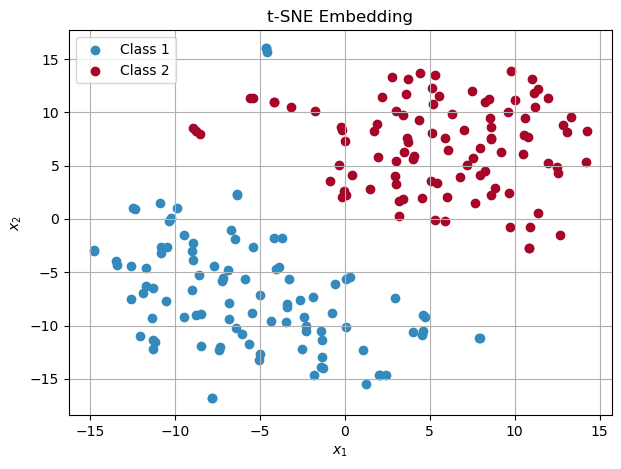

In [19]:
# Plotting the t-SNE embedding
plt.figure(figsize=(7, 5))
plt.scatter(embedding[:n_points, 0], embedding[:n_points, 1], label='Class 1')
plt.scatter(embedding[n_points:, 0], embedding[n_points:, 1], label='Class 2')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('t-SNE Embedding')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
print(f'KL Divergenece in the first iteration = {kl_divergences[0]}')
print(f'KL Divergence after {T} = {kl_divergences[-1]}')

KL Divergenece in the first iteration = 3.756956469946797
KL Divergence after 100 = 1.4034623116232954


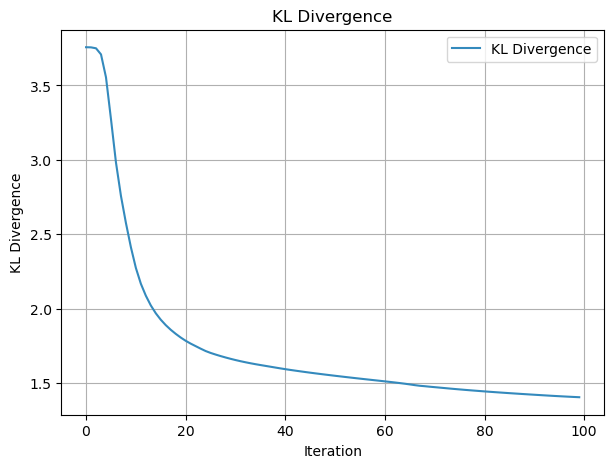

In [21]:
# Plotting the KL divergence
plt.figure(figsize=(7, 5))
plt.plot(np.arange(T), kl_divergences, label='KL Divergence')
plt.xlabel('Iteration')
plt.ylabel('KL Divergence')
plt.title('KL Divergence')
plt.grid(True)
plt.legend()
plt.show()

As the number of iterations increases, the KL divergence decreases. This is because the algorithm tries to minimize the KL divergence between the two distributions. After $100$ iterations, the above curve flattens out and the KL divergence does not decrease much. This is because the algorithm has converged and the KL divergence between the two distributions is approximately minimised.

We consider $\sigma_i = 0.1 \ \forall i$ as a surrogate for perplexity because we know that the data is generated from a Gaussian distribution with $\sigma = 0.1I$.

### Built-in TSNE

In [22]:
from sklearn.manifold import TSNE

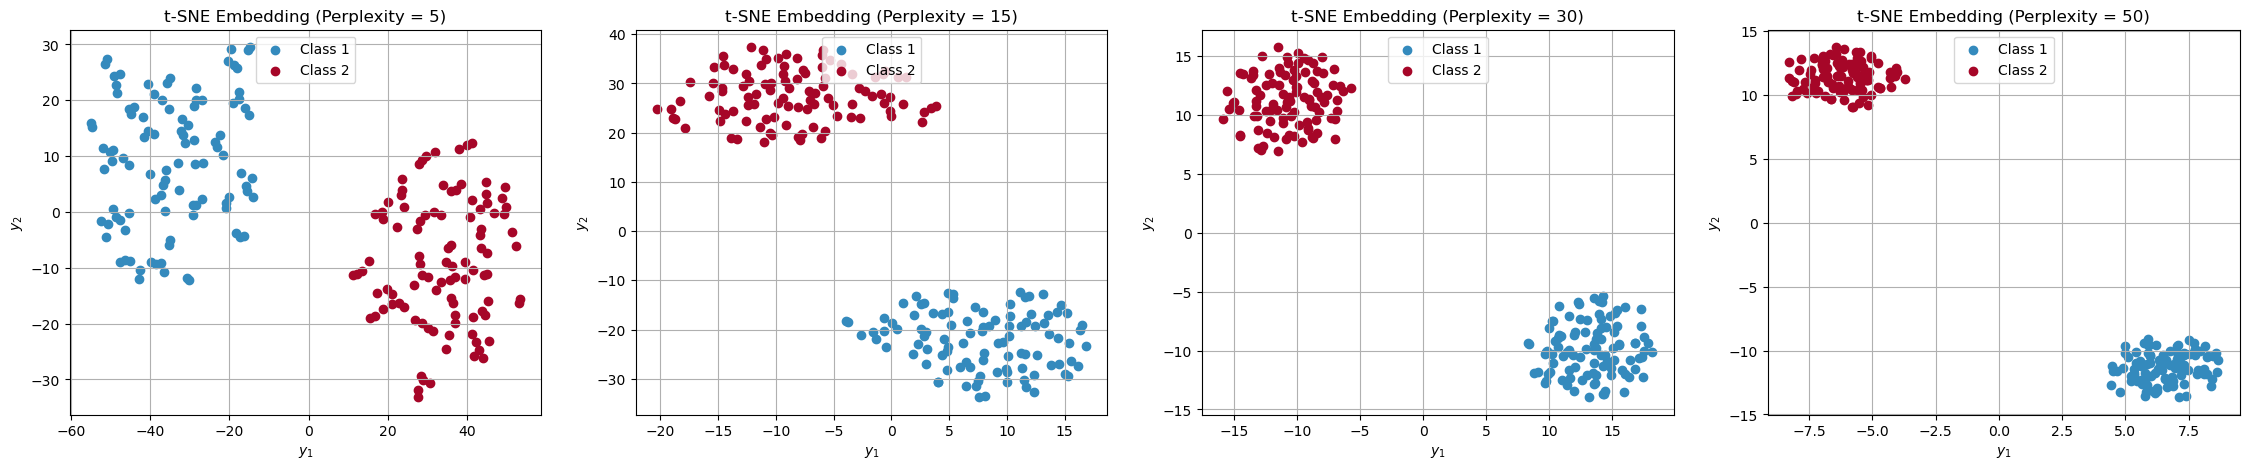

In [25]:
perplexities = [5, 15, 30, 50]
plt.figure(figsize=(7*len(perplexities), 5))

for idx, perplexity in enumerate(perplexities):
    # Reference -> https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
    embeddings = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=perplexity).fit_transform(data) 
    plt.subplot(1, len(perplexities), idx+1)
    plt.scatter(embeddings[:n_points, 0], embeddings[:n_points, 1], label='Class 1')
    plt.scatter(embeddings[n_points:, 0], embeddings[n_points:, 1], label='Class 2')
    plt.xlabel(r'$y_1$')
    plt.ylabel(r'$y_2$')
    plt.title(f't-SNE Embedding (Perplexity = {perplexity})')
    plt.grid(True)
    plt.legend(loc="upper center")
plt.show()

As we increase the perplexity, we can see that the clusters are becoming more compact, in a sense that the points are closer to each other. As we are increasing the perplexity, we are increasing the entropy of the distribution, which is making the variance of the distribution higher. Thus, it is making the clusters more compact.